# Explore LFP (Local Field Potential) Analysis in the Utah Organoids Pipeline


### **Overview**

This notebook guides users through the process of exploring Local Field Potential (LFP) data within the Utah Organoids pipeline. LFP signals capture low-frequency neuronal activity and are useful for analyzing brain state dynamics, oscillatory activity, and spectral properties.

By the end of this notebook, you will:
- Select and inspect an LFP session
- Extract and visualize LFP traces
- Perform spectral analysis


**_Note:_**

- This notebook uses example data, replace values with actual database entries.

### **Key Steps**

- **Setup**

- **Step 1: Select Session of Interest**

- **Step 2: Visualizing LFP Traces**

- **Step 3: Explore Spectral Analysis**


#### **Setup**


In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [2]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
from workflow.pipeline import culture, ephys, probe, analysis

[2025-03-19 17:02:03,892][INFO]: Connecting milagros@db.datajoint.com:3306
[2025-03-19 17:02:05,610][INFO]: Connected milagros@db.datajoint.com:3306


#### **Step 1: Select Session of Interest**


In [4]:
key = (
    ephys.EphysSession * ephys.EphysSessionProbe
    & 'organoid_id="MB07"'
    & 'session_type="both"'
).fetch1("KEY")

In [5]:
ephys.EphysSession * ephys.EphysSessionInfo & key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,session_type,session_info Session header info from intan .rhd file. Get this from the first session file.
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,both,=BLOB=


#### **Step 2: Explore `Probe` Schema**


In [6]:
probe.Probe()

probe unique identifier for this model of probe (e.g. serial number),probe_type e.g. A1x32-6mm-100-177-H32_21mm,probe_comment
12D4D,A1x32-6mm-100-177-H32_21mm,
12D51,A1x32-6mm-100-177-H32_21mm,
12D76,A1x32-6mm-100-177-H32_21mm,
12D77,A1x32-6mm-100-177-H32_21mm,
Q983,A1x32-6mm-100-177-H32_21mm,
T590,A1x32-6mm-100-177-H32_21mm,
T591,A1x32-6mm-100-177-H32_21mm,
T593,A1x32-6mm-100-177-H32_21mm,
T595,A1x32-6mm-100-177-H32_21mm,


In the `Electrode` table each electrode in the probe is mapped with the channel name fetched from the raw data and stored as `channel_idx`:


In [7]:
probe.ElectrodeConfig.Electrode()

electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0","channel_idx channel name fetched from raw data (e.g., A-001)"
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,16
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,15
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,17
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,3,14
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,18
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,5,13
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,20
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,7,11
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,21
699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,10


#### **Step 3: Explore `LFP`**


In [8]:
ephys.LFP & key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,lfp_sampling_rate Down-sampled sampling rate (Hz).
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,2500.0


In [9]:
ephys.LFP.Trace & key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",lfp
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,=BLOB=
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,=BLOB=
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,=BLOB=
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,3,=BLOB=
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,=BLOB=
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,5,=BLOB=
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,=BLOB=
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,7,=BLOB=
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,=BLOB=
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,=BLOB=


In [10]:
lfp_plots, electrodes = (ephys.LFP.Trace & key).fetch("lfp", "electrode")
average_lfp = np.mean(lfp_plots, axis=0)
sampling_rate = (ephys.LFP & key).fetch1("lfp_sampling_rate")
time = np.arange(len(average_lfp)) / sampling_rate

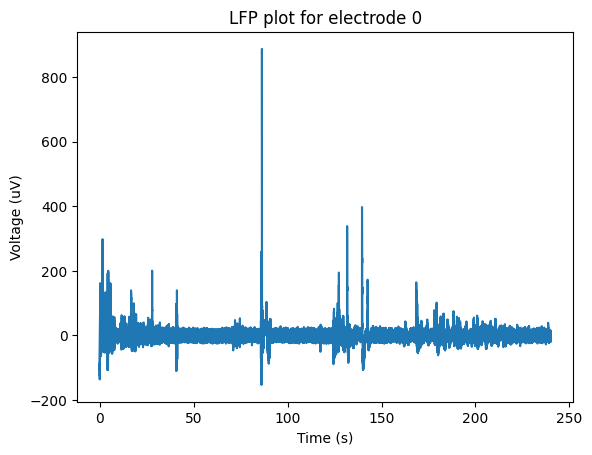

In [20]:
# Plot an example of LFP plot
fig = plt.figure()
plt.plot(time, lfp_plots[0])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (uV)")
plt.title(f"LFP plot for electrode {electrodes[0]}")
plt.show()


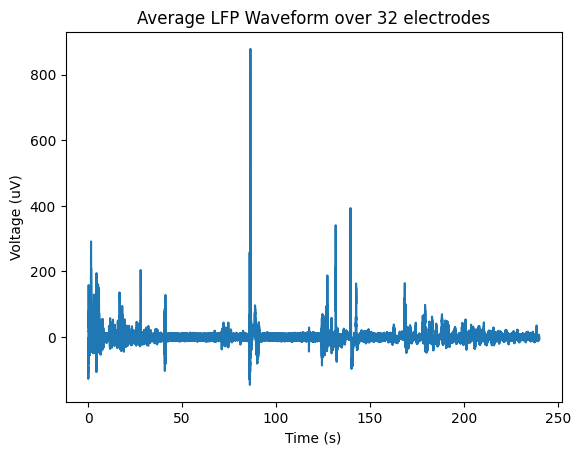

In [19]:
# Create the average LFP Waveform figure
fig = plt.figure()
plt.plot(time, average_lfp)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (uV)")
plt.title(f"Average LFP Waveform over {len(lfp_plots)} electrodes")
plt.show()


#### **Step 4: Explore Spectral Analysis**


In [13]:
analysis.SpectralBand()

band_name,lower_freq (Hz),upper_freq (Hz)
alpha,8.0,12.0
beta,13.0,30.0
delta,2.0,4.0
gamma,30.0,50.0
highgamma1,70.0,110.0
highgamma2,130.0,500.0
theta,4.0,7.0


In [14]:
analysis.SpectrogramParameters()

param_idx,window_size Time in seconds,overlap_size Time in seconds,description
0,0.5,0.0,Default 0.5s time segments without overlap.


In [15]:
analysis.LFPSpectrogram & key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",param_idx
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,0
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,3,0
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,0
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,5,0
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,0
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,7,0
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,0
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,0


In [16]:
analysis.LFPSpectrogram.ChannelPower & key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",param_idx,band_name,power Mean power in spectral band as a function of time,mean_power Mean power in a spectral band for a time window.,std_power Standard deviation of the power in a spectral band for a time window.
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,alpha,=BLOB=,4.10399,28.8728
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,beta,=BLOB=,0.885049,6.48606
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,delta,=BLOB=,73.3158,534.832
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,gamma,=BLOB=,0.295735,2.16461
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,highgamma1,=BLOB=,0.084186,0.450303
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,highgamma2,=BLOB=,0.0282198,0.037881
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,theta,=BLOB=,11.7954,67.8141
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,alpha,=BLOB=,4.17516,28.8816
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,beta,=BLOB=,0.906255,6.35593
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,delta,=BLOB=,71.816,512.785


In [17]:
(analysis.LFPSpectrogram.ChannelPower & key).proj(
    "band_name", "mean_power", "std_power"
)

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",param_idx,band_name,mean_power Mean power in a spectral band for a time window.,std_power Standard deviation of the power in a spectral band for a time window.
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,alpha,4.10399,28.8728
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,beta,0.885049,6.48606
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,delta,73.3158,534.832
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,gamma,0.295735,2.16461
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,highgamma1,0.084186,0.450303
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,highgamma2,0.0282198,0.037881
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,0,theta,11.7954,67.8141
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,alpha,4.17516,28.8816
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,beta,0.906255,6.35593
MB07,2024-09-07 14:49:00,0,2024-09-07 14:49:00,2024-09-07 14:53:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,0,delta,71.816,512.785


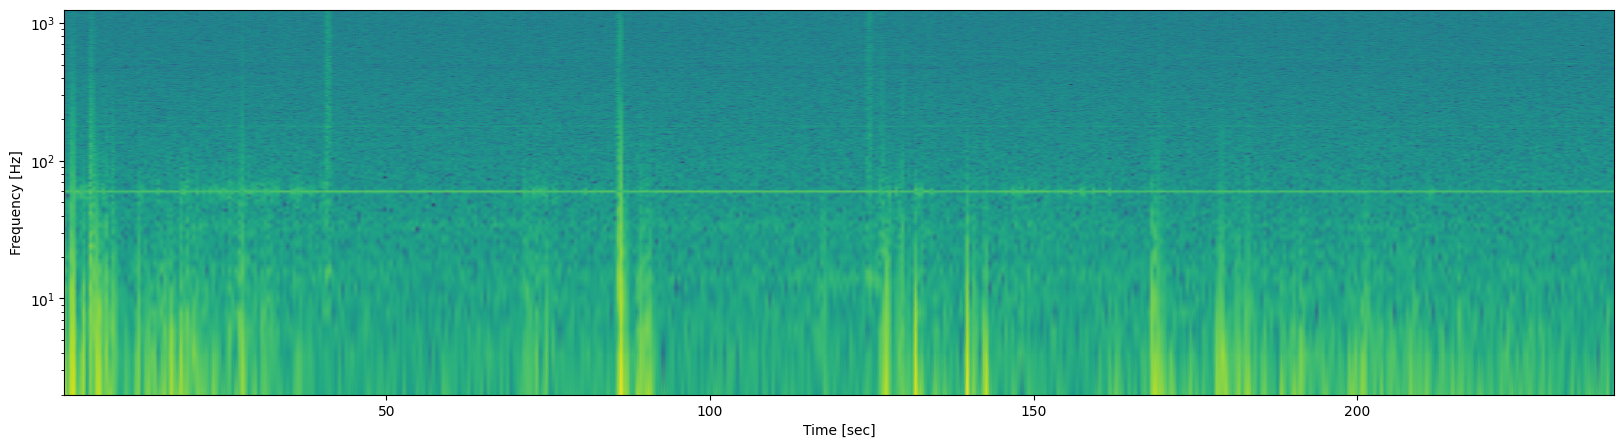

In [18]:
# Plot spectrogram for a single electrode
electrode = 10  # select electrode

Sxx, t, f = (
    analysis.LFPSpectrogram.ChannelSpectrogram & key & {"electrode": electrode}
).fetch("spectrogram", "time", "frequency", limit=1)
Sxx = Sxx[0]
t = t[0]
f = f[0]

fig, ax = plt.subplots(figsize=(20, 5))
ax.pcolormesh(t, f[1:1000], np.log(Sxx[1:1000]), shading="gouraud")
plt.yscale("log")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.show()